# Method
## Data Generating
We choose 800 points on the interval [-1, 1] uniformly for the training data, 100 points for the validation data, and 100 for the test data.
## Network Architecture
- Input layer: 1 input, x
- Hidden layer: 2 layers. Each layer includes 64 neurons with ReLU as the active function.
- Output layer: 1 neuron. Output y.
## Training Process
- Loss function: We choose MSE as the loss function. It measures the average squared difference between the true values ($y_i$) and the network's predictions ($\hat{y_i}$) 
$ \text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 $
- Optimizer: The Adam optimization algorithm was used to perform the gradient-based parameter updates, which is widely used in many scenario. A constant learning rate of $\eta$ = 0.001 was used throughout the training.
- Training Loop: 4000 epochs. Full-batch gradient descent



In [51]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


def runge_function(x):
    return 1 / (1 + 25 * x**2)

# Generating datasets
x_train = torch.linspace(-1, 1, 800).view(-1, 1)
y_train = runge_function(x_train)

x_val = torch.linspace(-0.95, 0.95, 100).view(-1, 1)
y_val = runge_function(x_val)

x_test = torch.linspace(-1, 1, 100).view(-1, 1)
y_test = runge_function(x_test)


# Define the neural network
class RungeNet(nn.Module):
    def __init__(self):
        super(RungeNet, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(1, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.network(x)

model = RungeNet()

learning_rate = 0.001
epochs = 4000
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train_losses = []
val_losses = []

print("\nStart training...")
for epoch in range(epochs):
    model.train()  
    
    # Forward prop
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    
    # Backward prop 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Evaluating
    model.eval() 
    with torch.no_grad():
        y_val_pred = model(x_val)
        val_loss = criterion(y_val_pred, y_val)

    # Record losses
    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    if (epoch + 1) % 200 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Train loss: {loss.item():.6f}, Var loss: {val_loss.item():.6f}')
print("Training complete.")


Start training...
Epoch [200/4000], Train loss: 0.002306, Var loss: 0.002347
Epoch [400/4000], Train loss: 0.000087, Var loss: 0.000089
Epoch [600/4000], Train loss: 0.000029, Var loss: 0.000029
Epoch [800/4000], Train loss: 0.000016, Var loss: 0.000016
Epoch [1000/4000], Train loss: 0.000010, Var loss: 0.000010
Epoch [1200/4000], Train loss: 0.000007, Var loss: 0.000006
Epoch [1400/4000], Train loss: 0.000006, Var loss: 0.000005
Epoch [1600/4000], Train loss: 0.000003, Var loss: 0.000003
Epoch [1800/4000], Train loss: 0.000006, Var loss: 0.000006
Epoch [2000/4000], Train loss: 0.000002, Var loss: 0.000003
Epoch [2200/4000], Train loss: 0.000002, Var loss: 0.000002
Epoch [2400/4000], Train loss: 0.000003, Var loss: 0.000002
Epoch [2600/4000], Train loss: 0.000002, Var loss: 0.000002
Epoch [2800/4000], Train loss: 0.000001, Var loss: 0.000001
Epoch [3000/4000], Train loss: 0.000001, Var loss: 0.000001
Epoch [3200/4000], Train loss: 0.000001, Var loss: 0.000001
Epoch [3400/4000], Train 

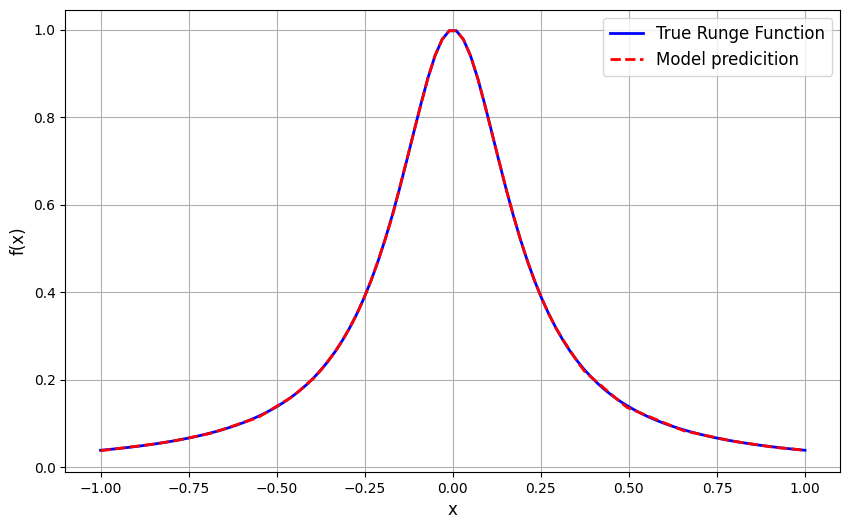

In [52]:
# Plotting prediction
model.eval()
with torch.no_grad():
    y_pred_test = model(x_test)

plt.figure(figsize=(10, 6))
plt.plot(x_test.numpy(), y_test.numpy(), 'b-', label='True Runge Function', linewidth=2)
plt.plot(x_test.numpy(), y_pred_test.numpy(), 'r--', label='Model predicition', linewidth=2)
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

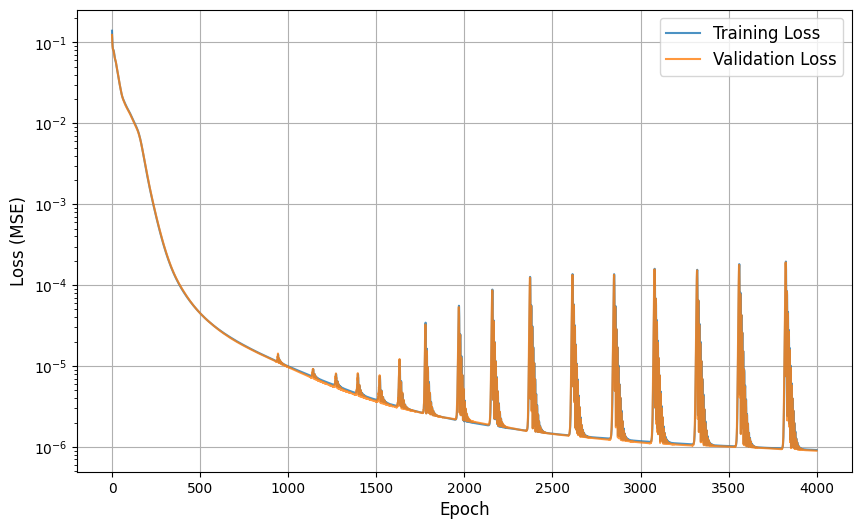

In [56]:
# Plotting loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss', alpha=0.8)
plt.plot(val_losses, label='Validation Loss', alpha=0.8)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.yscale('log')
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

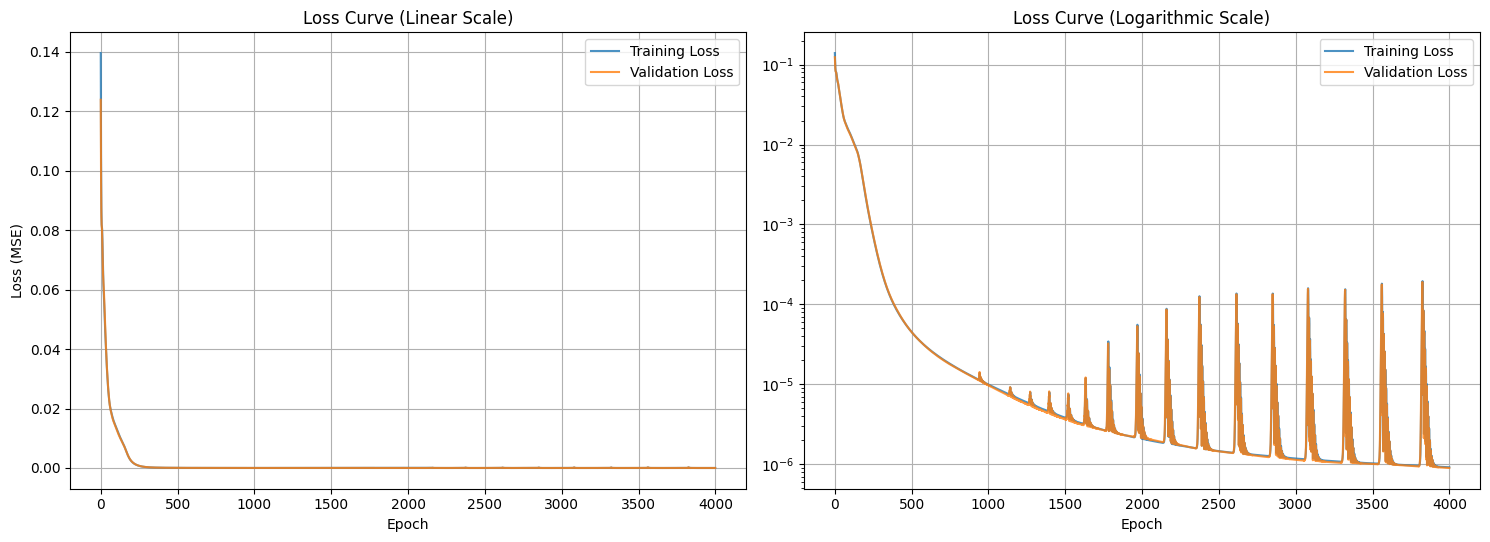

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# --- Plot 1: Linear Scale ---
axes[0].plot(train_losses, label='Training Loss', alpha=0.8)
axes[0].plot(val_losses, label='Validation Loss', alpha=0.8)
axes[0].set_title('Loss Curve (Linear Scale)')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss (MSE)')
axes[0].legend()
axes[0].grid(True)

# --- Plot 2: Logarithmic Scale ---
axes[1].plot(train_losses, label='Training Loss', alpha=0.8)
axes[1].plot(val_losses, label='Validation Loss', alpha=0.8)
axes[1].set_title('Loss Curve (Logarithmic Scale)')
axes[1].set_xlabel('Epoch')
axes[1].set_yscale('log') 
axes[1].legend()
axes[1].grid(True)

# Adjust layout to prevent titles/labels from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plots
plt.show()

In [54]:
mse_error = criterion(y_pred_test, y_test).item()
max_error = torch.max(torch.abs(y_pred_test - y_test)).item()

print(f"  - MSE: {mse_error:.8f}")
print(f"  - Max Absolute Error: {max_error:.8f}")

  - MSE: 0.00000096
  - Max Absolute Error: 0.00403537
